In [1]:
import splitfolders
splitfolders.ratio("data", output="dataset", seed=1337, ratio=(0.8, 0.2))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [3]:
train_dir = 'dataset/train'
validation_dir = 'dataset/val/'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 652 images belonging to 5 classes.
Found 192 images belonging to 5 classes.


In [16]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 35, 35, 64)       

In [18]:
history = model.fit(
      train_generator,
      batch_size=32,
      epochs=10, 
      validation_data=validation_generator,
      verbose=2)

Epoch 1/10
163/163 - 15s - loss: 1.6184 - accuracy: 0.1825 - val_loss: 1.5436 - val_accuracy: 0.5312 - 15s/epoch - 91ms/step
Epoch 2/10
163/163 - 19s - loss: 1.0995 - accuracy: 0.5798 - val_loss: 0.6418 - val_accuracy: 0.7031 - 19s/epoch - 118ms/step
Epoch 3/10
163/163 - 22s - loss: 0.6636 - accuracy: 0.7316 - val_loss: 0.5319 - val_accuracy: 0.7812 - 22s/epoch - 136ms/step
Epoch 4/10
163/163 - 23s - loss: 0.5129 - accuracy: 0.7837 - val_loss: 0.4766 - val_accuracy: 0.8698 - 23s/epoch - 141ms/step
Epoch 5/10
163/163 - 23s - loss: 0.3992 - accuracy: 0.8451 - val_loss: 0.4169 - val_accuracy: 0.8802 - 23s/epoch - 140ms/step
Epoch 6/10
163/163 - 22s - loss: 0.3666 - accuracy: 0.8604 - val_loss: 0.3225 - val_accuracy: 0.9375 - 22s/epoch - 137ms/step
Epoch 7/10
163/163 - 22s - loss: 0.3292 - accuracy: 0.8666 - val_loss: 0.4878 - val_accuracy: 0.8958 - 22s/epoch - 132ms/step
Epoch 8/10
163/163 - 21s - loss: 0.3083 - accuracy: 0.8819 - val_loss: 0.4665 - val_accuracy: 0.8854 - 21s/epoch - 132m

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


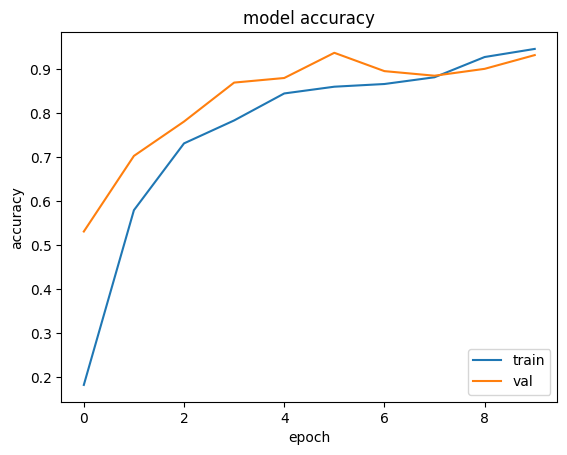

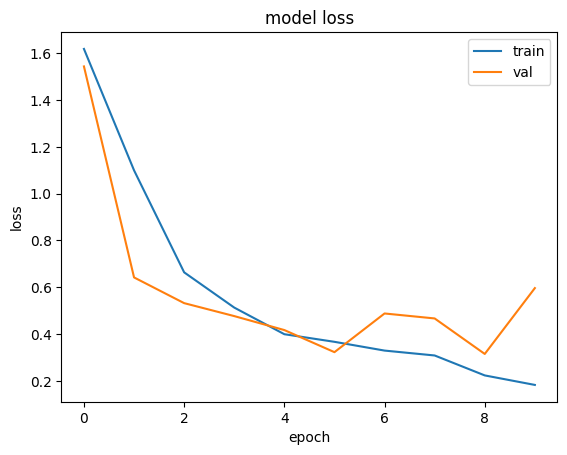

In [19]:
print(history.history.keys())
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

 3/48 [>.............................] - ETA: 1s

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11928\1233824776.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


48/48 [==============================] - 1s 21ms/step


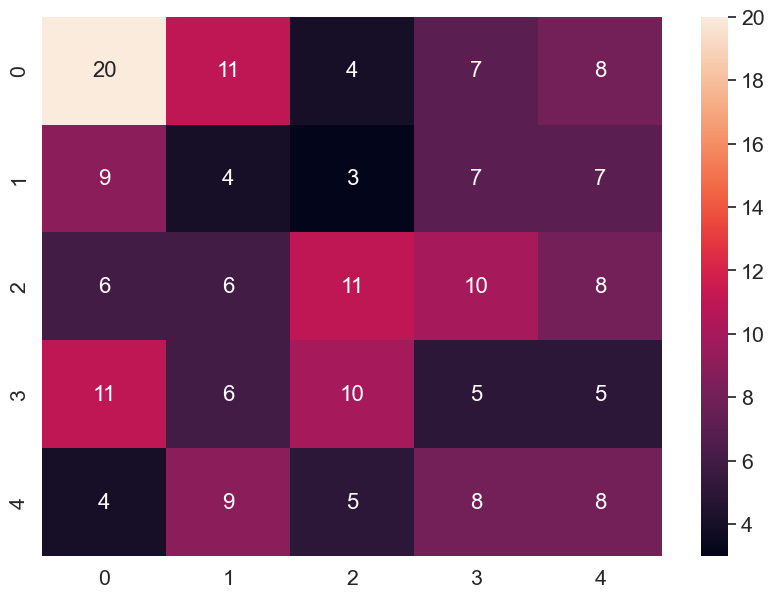

              precision    recall  f1-score   support

         3a1       0.40      0.40      0.40        50
         3b1       0.11      0.13      0.12        30
         3b2       0.33      0.27      0.30        41
         lab       0.14      0.14      0.14        37
      pantry       0.22      0.24      0.23        34

    accuracy                           0.25       192
   macro avg       0.24      0.23      0.24       192
weighted avg       0.26      0.25      0.25       192

[[20 11  4  7  8]
 [ 9  4  3  7  7]
 [ 6  6 11 10  8]
 [11  6 10  5  5]
 [ 4  9  5  8  8]]


In [26]:
import numpy
from sklearn import metrics
import seaborn as sn
import pandas as pd

# test_generator = ImageDataGenerator(
#                     rescale=1./255)
# test_data_generator = test_generator.flow_from_directory(
#     validation_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     shuffle=True)

test_data_generator = validation_generator
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
confusion = metrics.confusion_matrix(true_classes, predicted_classes)

df_cm = pd.DataFrame(confusion, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()
print(report)
print(confusion)  